In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.layers import Dense,Dropout

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from sklearn.svm import SVC

In [35]:
def run_ML_models(X:pd.DataFrame, y:np.array, algorithms:list, cv=10, scoring='accuracy'):
  """_summary_

  Args:
      X (pd.DataFrame): _description_
      y (np.array): _description_
  """
  
  # Split the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  accuracies = {}
  for algorithm in algorithms:
  
    if type(algorithm).__name__ == "Sequential":
          # Building the model
          model = Sequential()
          model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
          model.add(Dense(15, activation='relu'))  # Second hidden layer with 15 neurons
          model.add(Dense(1, activation='sigmoid'))  # Output layer
          # Compile the model
          model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
          # Train the model
          model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)
          accuracies[type(algorithm).__name__] = np.mean(scores)
    else:
          algorithm.fit(X_train, y_train)
          scores = cross_val_score(algorithm, X_test, y_test, cv=cv, scoring=scoring)
          accuracies[type(algorithm).__name__] = np.mean(scores)
  
  return accuracies


def plot_algorithms(accuracies):
    """
    Plot a bar graph of accuracies for each algorithm.

    Parameters:
    - accuracies: Dictionary containing the accuracies of each algorithm.
    """

    algorithms = list(accuracies.keys())
    scores = list(accuracies.values())

    plt.figure(figsize=(10, 6))
    plt.barh(algorithms, scores, color='skyblue')
    plt.xlabel('Accuracy')
    plt.ylabel('Algorithm')
    plt.title('Accuracy of Machine Learning Algorithms')
    plt.xlim(0, 1)  # Set x-axis limits to range from 0 to 1
    plt.show()

In [45]:
df = pd.read_csv("Steel_industry.csv")
df

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


In [46]:
df.drop("Date_Time", inplace=True, axis=1)

In [47]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000
mean,27.386229,13.035012,3.871412,0.011524,80.578610,84.366038,42750.834736
std,33.444133,16.305916,7.424863,0.016151,18.921337,30.458030,24940.667915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21600.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,43200.000000
75%,51.230000,22.640000,2.090000,0.020000,99.030000,100.000000,64800.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35041 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35041 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35041 non-null  float64
 3   CO2(tCO2)                             35041 non-null  float64
 4   Lagging_Current_Power_Factor          35041 non-null  float64
 5   Leading_Current_Power_Factor          35041 non-null  float64
 6   NSM                                   35041 non-null  int64  
 7   WeekStatus                            35041 non-null  object 
 8   Day_Of_Week                           35041 non-null  object 
 9   Load_Type                             35041 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.7+ MB


In [49]:
le = LabelEncoder()
cat_cols = ["WeekStatus", "Day_Of_Week", "Load_Type"]
for label in cat_cols:
    df[label] = le.fit_transform(df[label])

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,3.17,2.95,0.00,0.0,73.21,100.00,900,0,1,0
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,0,1,0
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,0,1,0
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,0,1,0
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,0,1,0
...,...,...,...,...,...,...,...,...,...,...
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,0,1,0
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,0,1,0
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,0,1,0
35039,3.67,3.02,0.07,0.0,77.22,99.98,0,0,1,0


In [50]:
for col in df.columns[:-1]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5*IQR)) & (df[col] <= (Q3 + 1.5*IQR))]

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Epoch 1/100
1454/1454 [==============================] - 1s 509us/step - loss: -2411.0779 - accuracy: 0.2818
Epoch 2/100
1454/1454 [==============================] - 1s 458us/step - loss: -37140.8086 - accuracy: 0.2809
Epoch 3/100
1454/1454 [==============================] - 1s 457us/step - loss: -154569.9844 - accuracy: 0.2918
Epoch 4/100
1454/1454 [==============================] - 1s 454us/step - loss: -388794.3438 - accuracy: 0.2923
Epoch 5/100
1454/1454 [==============================] - 1s 451us/step - loss: -754005.8750 - accuracy: 0.2926
Epoch 6/100
1454/1454 [==============================] - 1s 478us/step - loss: -1269343.7500 - accuracy: 0.2952
Epoch 7/100
1454/1454 [==============================] - 1s 450us/step - loss: -1976715.1250 - accuracy: 0.2957
Epoch 8/100
1454/1454 [==============================] - 1s 454us/step - loss: -2898357.0000 - accuracy: 0.2955
Epoch 9/100
1454/1454 [==============================] - 1s 454us/step - loss: -4041664.2500 - accuracy: 0.2950


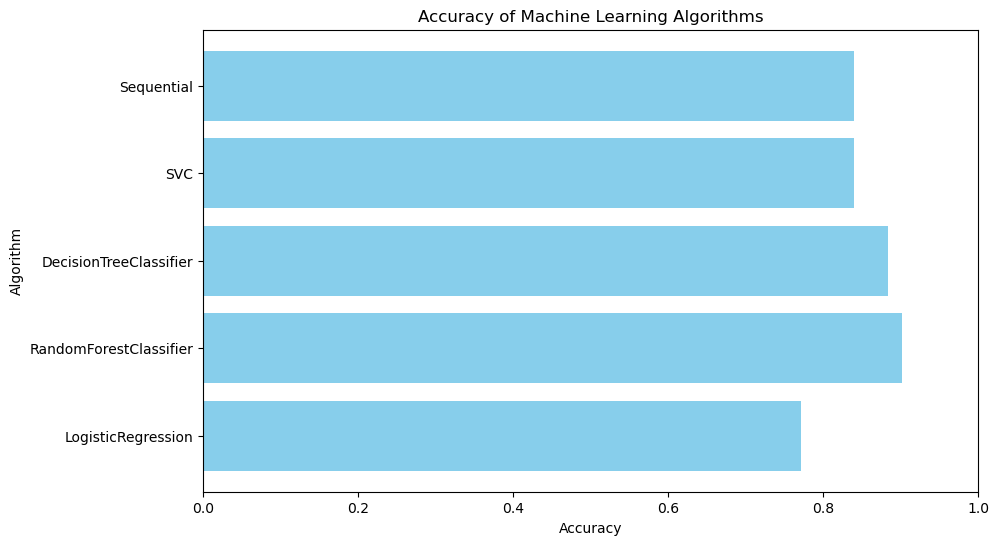

In [54]:

X, y = df.iloc[:,:-1], df.iloc[:,-1]
LR = LogisticRegression()
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
# SVC = SVC()
NEURAL_NETWORK = Sequential()
algorithms = [LR, RFC, DTC, SVC, NEURAL_NETWORK]

# Compare algorithms and plot accuracies
accuracies = run_ML_models(X,y, algorithms)
plot_algorithms(accuracies)

In [55]:
print(accuracies)

{'LogisticRegression': 0.7710403233130505, 'RandomForestClassifier': 0.901476553749281, 'DecisionTreeClassifier': 0.8838737020555202, 'SVC': 0.8392857142857142, 'Sequential': 0.8392857142857142}
